In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Build Discriminator and Generator

In [4]:
x_ = tf.placeholder(tf.float32, shape=[None,1])
z_ = tf.placeholder(tf.float32, shape=[None,1])

In [5]:
w1 = tf.Variable(tf.random_uniform([1,100], -1, 1))
w2 = tf.Variable(tf.random_uniform([100,100], -1, 1))
w3 = tf.Variable(tf.random_uniform([100,100], -1, 1))
w4 = tf.Variable(tf.random_uniform([100,1], -1, 1))
b1 = tf.Variable(tf.random_normal([100]))
b2 = tf.Variable(tf.random_normal([100]))
b3 = tf.Variable(tf.random_normal([100]))
b4 = tf.Variable(tf.random_normal([1]))

In [6]:
A2_real = tf.sigmoid(tf.matmul(x_, w1) + b1)
A3_real = tf.sigmoid(tf.matmul(A2_real, w2) + b2)
A4_real = tf.sigmoid(tf.matmul(A3_real, w3) + b3)
D_real = tf.sigmoid(tf.matmul(A4_real, w4) + b4)

In [7]:
w1_G = tf.Variable(tf.zeros([1,100]))
w2_G = tf.Variable(tf.random_uniform([100,100],-1,1))
w3_G = tf.Variable(tf.random_uniform([100,100],-1,1))
w4_G = tf.Variable(tf.random_uniform([100,1], -1, 1))
b1_G = tf.Variable(tf.zeros([100]))
b2_G = tf.Variable(tf.zeros([100]))
b3_G = tf.Variable(tf.zeros([100]))
b4_G = tf.Variable(tf.random_uniform([1],-10,10))

In [8]:
Z2 = tf.sigmoid(tf.matmul(z_, w1_G) + b1_G)
Z3 = tf.sigmoid(tf.matmul(Z2, w2_G) + b2_G)
Z4 = tf.sigmoid(tf.matmul(Z3, w3_G) + b3_G)
G = tf.matmul(Z4, w4_G) + b4_G

In [9]:
A2_fake = tf.sigmoid(tf.matmul(G, w1) + b1)
A3_fake = tf.sigmoid(tf.matmul(A2_fake, w2) + b2)
A4_fake = tf.sigmoid(tf.matmul(A3_fake, w3) + b3)
D_fake = tf.sigmoid(tf.matmul(A4_fake, w4) + b4)

# Calculate Cost Function and Train Model

In [10]:
cost_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_fake))
cost_G = tf.reduce_mean(tf.log(1-D_fake))

In [11]:
train_D = tf.train.GradientDescentOptimizer(0.5).minimize(-cost_D, var_list = [w1,w2,b1,b2])
train_G = tf.train.GradientDescentOptimizer(0.5).minimize(cost_G, var_list = [w1_G,w2_G,b1_G,b2_G])

# Prepare Real Data and Fake Data

In [12]:
# x = np.random.normal(loc=3., scale = 1.5, size=[5000, 1])
# x = np.random.uniform(low = -5, high=5, size=[5000,1])
x1 = np.random.normal(loc=-2.,scale=0.5, size=[5000,1])
x2 = np.random.normal(loc=2., scale=0.5, size=[5000,1])
z = np.random.rand(5000,1)

In [13]:
x = []
for idx in range(len(x1)):
    if np.random.rand() < 0.7:
        x.append(x1[idx, 0])
    else:
        x.append(x2[idx, 0])
x = np.array(x).reshape(-1,1)

In [14]:
indexx1 = np.random.choice(len(x1), size = 1500, replace = False)
indexx2 = np.random.choice(len(x2), size = 3500, replace = False)

In [15]:
x1 = x1[indexx1]
x2 = x2[indexx2]
x = np.concatenate((x1,x2))

# Train this model

In [17]:
sess = tf.Session()

In [18]:
init = tf.initialize_all_variables()
sess.run(init)

In [19]:
k = 10
minibatch_size_1 = 100
minibatch_size_2 = 100
for i in range(10000):
    for _ in range(k):
        minibatch_idx = np.random.choice(range(len(x)), size=minibatch_size_1, replace=False)
        sess.run(train_D, feed_dict={x_: x[minibatch_idx], z_:z[minibatch_idx]})
    
    if i%1000 == 0:
        print('cost_D ', sess.run(cost_D, feed_dict={x_: x, z_:z}))
    
    minibatch_idx = np.random.choice(range(len(x)), size=minibatch_size_2, replace=False)
    
    sess.run(train_G, feed_dict={z_ :z[minibatch_idx]})
    if i%1000 == 0:
        print('cost_G ', sess.run(cost_G, feed_dict={z_ :z}))

('cost_D ', -0.22388633)
('cost_G ', -0.12718879)
('cost_D ', -1.0972612)
('cost_G ', -0.54337007)
('cost_D ', -1.1308568)
('cost_G ', -0.51305664)
('cost_D ', -1.2848309)
('cost_G ', -0.66072196)
('cost_D ', -1.338493)
('cost_G ', -0.67843163)
('cost_D ', -1.3561318)
('cost_G ', -0.67887723)
('cost_D ', -1.3362246)
('cost_G ', -0.72853196)
('cost_D ', -1.3610775)
('cost_G ', -0.70196384)
('cost_D ', -1.3629304)
('cost_G ', -0.67547596)
('cost_D ', -1.3626269)
('cost_G ', -0.70886683)


# Plot the Real Distribution and Generated Distribution

In [20]:
x_test = np.linspace(-5,5,num = 100).reshape(-1, 1)
# x_test = np.linspace(-4,10,num = 100).reshape(-1, 1)
D_test = sess.run(D_real, feed_dict={x_ : x_test})
G_test = sess.run(G, feed_dict={z_ :z})

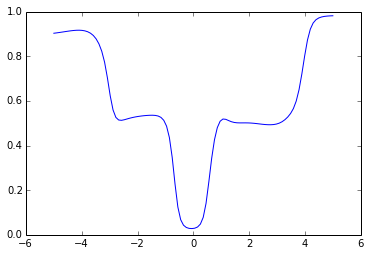

In [21]:
plt.plot(x_test,D_test)

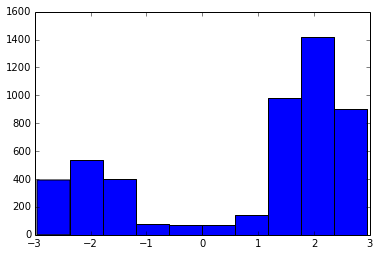

In [22]:
plt.hist(G_test);

(array([   41.,   438.,   759.,   251.,    11.,    14.,   381.,  1678.,
         1270.,   157.]),
 array([-3.67616924, -2.9529251 , -2.22968096, -1.50643682, -0.78319268,
        -0.05994854,  0.6632956 ,  1.38653974,  2.10978388,  2.83302802,
         3.55627216]),
 <a list of 10 Patch objects>)

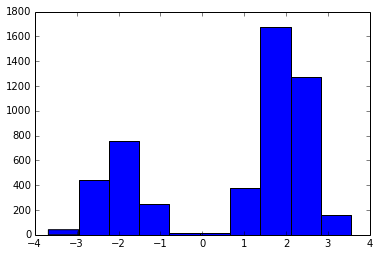

In [23]:
plt.hist(x)

# Use Parzen Window to calculate the distribution

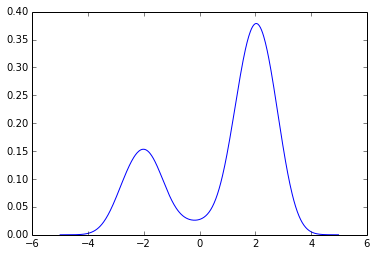

In [28]:
h = 0.5
X = np.arange(-5, 5, 0.02)

# for each point in x, we have compute its pdf
Y = np.array([])
N = len(G_test)

for x_window in X:
    t = 0
    for xi in G_test:
        t += np.exp(-(x_window-xi)**2/(2*h*h))
    
    y = (t/(2*np.pi*h*h)**0.5)/N
    Y = np.append(Y, y)

plt.plot(X, Y)
# plt.xlabel('Generated data')
# plt.savefig('G_mixture.jpg')
plt.show()

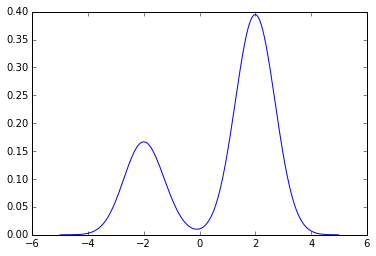

In [29]:
h = 0.5
X = np.arange(-5, 5, 0.02)

# for each point in x, we have compute its pdf
Y = np.array([])
N = len(x)

for x_window in X:
    t = 0
    for xi in x:
        t += np.exp(-(x_window-xi)**2/(2*h*h))
    
    y = (t/(2*np.pi*h*h)**0.5)/N
    Y = np.append(Y, y)

plt.plot(X, Y)
# plt.xlabel('Real data')
# plt.savefig('Mixture.jpg')
plt.show()

# Calculate the KL divergence

In [26]:
kl = 0
for i in range(5000):
    kl = kl + x[i]*np.log(np.absolute(x[i]/G_test[i]))
print kl

[ 478.35969008]
